# Imports

In [2]:
import os
import pandas as pd
import pickle
from models.reddit_scraper import RedditScraper
from config.settings import USER_AGENT
from utils.analysis import create_posts_dataframe

# Collect Subreddit Data

In [137]:
# scraper = RedditScraper(USER_AGENT)
subs_of_interest = ['TooAfraidToAsk', 'AskMen', 'AskWomen']
# # subs_of_interest = ['AskWomen']

# posts_list = []

# for sub in subs_of_interest:
#     posts = scraper.get_subreddit_posts(
#         sub,
#         limit=900,
#         sort="top",
#         cache=False
#     )
#     df = create_posts_dataframe(posts)
#     df['subreddit'] = sub
#     posts_list.append(df)

In [3]:
# posts_df = pd.concat(posts_list)
posts_df = pd.read_feather('data/posts_df.feather')
posts_df = posts_df.reset_index(drop=True)
print(f"Retrieved {len(posts_df)} total posts.")

Retrieved 2700 total posts.


In [4]:
len(posts_df["url"].unique())

2700

In [5]:
# Write posts_df to feather
posts_df.to_feather('data/posts_df.feather')

In [6]:
# Naive Bayes Classifier

Summarise NBC results: 



In [7]:
posts_df.iloc[0].url

'https://www.reddit.com/r/TooAfraidToAsk/comments/lj1079/why_does_nobody_seem_to_care_about_the_fact_that/'

In [8]:
posts_df.head()

,title,selftext,url,domain,time,author,subreddit
0,Why does nobody seem to care about the fact th...,Have we not learnt from the lessons of the pas...,https://www.reddit.com/r/TooAfraidToAsk/commen...,None,2021-02-13 13:58:32,JambaJuice__,TooAfraidToAsk
1,Why does everyone write ages the wrong way on ...,I always see posts like “My (29M) girlfriend (...,https://www.reddit.com/r/TooAfraidToAsk/commen...,None,2022-05-22 02:25:51,TinyTimothy06,TooAfraidToAsk
2,Why would Satan burn you in hell for disobeyin...,Should he not celebrate you instead because yo...,https://www.reddit.com/r/TooAfraidToAsk/commen...,None,2022-07-03 12:03:12,too_thick64,TooAfraidToAsk
3,Are people outside of the USA really laughing ...,"Edit:\n\nOk so that's about 17,882 yes's and 3...",https://www.reddit.com/r/TooAfraidToAsk/commen...,None,2020-07-31 23:40:01,[deleted],TooAfraidToAsk
4,Are we relieved Trump is not President today?,,https://www.reddit.com/r/TooAfraidToAsk/commen...,None,2022-02-24 22:42:19,Alert-Foot-64,TooAfraidToAsk


In [372]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from utils.text_processor import preprocess_text


posts_df["full_text"] = posts_df["title"] + " " + posts_df["selftext"]

label_pairs = [
    (text, subreddit)
    for text, subreddit in zip(posts_df['title'], posts_df['subreddit'])
]

corpus_text = [p[0] for p in label_pairs]
corpus_labels = [p[1] for p in label_pairs]

In [373]:
count_vectorizer = CountVectorizer(min_df=2, stop_words=None)
count_matrix = count_vectorizer.fit_transform(corpus_text)

count_df = pd.DataFrame(
    count_matrix.toarray(),
    columns=count_vectorizer.get_feature_names_out()
)

# Aggregate count_df by total count over all documents
count_df = count_df.sum().sort_values(ascending=False)
len(count_df)

2429

In [374]:
len(count_df[count_df > 10])

491

In [375]:
vectorizer = TfidfVectorizer(min_df=2, stop_words=None)
tfidf_matrix = vectorizer.fit_transform(corpus_text)

In [376]:
# feature_names = list(vectorizer.get_feature_names_out())
# targets = ["man", "men", "women", "woman",] # "sex", "consent", "relationship", "love", "dating", "afraid", "ask", "question", "tbh"]
# pos = [feature_names.index(target) for target in targets]

# feature_matrix = tfidf_matrix.toarray()[:, pos]

In [377]:
# # Plot bar chart of count_df
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# count_df.plot(kind='bar')

# # Remove tick labels
# plt.xticks([])

In [378]:
# vectorizer = TfidfVectorizer(min_df=2, stop_words=None)
# tfidf_matrix = vectorizer.fit_transform(corpus_text)

In [379]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

tfidf_df.head()

,000,10,100,100k,11,12,13,14,16,16f,...,you,young,younger,your,yours,yourself,yourselves,youth,youtube,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.09495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [380]:
from utils.analysis import plot_word_similarities_tsne

word_feature_names = vectorizer.get_feature_names_out()

# plot_word_similarities_tsne(
#     tfidf_matrix=tfidf_matrix,
#     feature_names=word_feature_names,
# )

/var/folders/gk/tqxjm09x5719vkn_v13nkv1m0000gn/T/ipykernel_37641/984917323.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_doc.show()


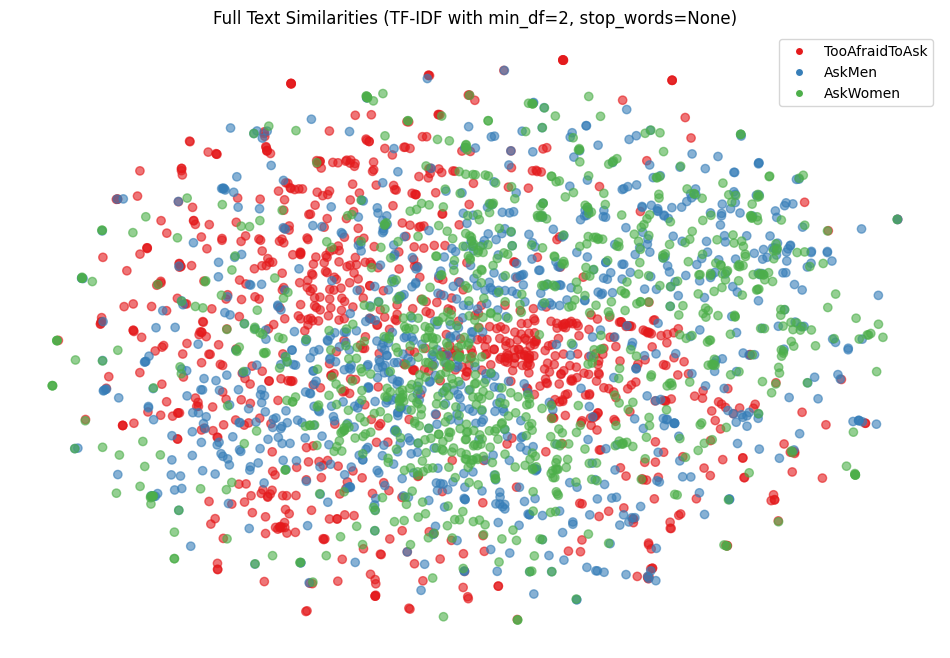

In [381]:
from utils.analysis import plot_similarities

# TODO: plot the clusters in 2D, and do some analysis on the top terms in each cluster
# Plot document similarities
fig_doc, ax_doc = plot_similarities(
    tfidf_matrix_dense,
    corpus_labels,
    method="tsne",
    label_color=True,
    use_text_annotations=False,
    title="Full Text Similarities (TF-IDF with min_df=2, stop_words=None)",
    is_documents=True # This is the default, but we'll specify it here for clarity
)
ax_doc.axis("off")
fig_doc.show()

In [382]:
tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 39191 stored elements and shape (2700, 2429)>

In [383]:
len(posts_df)

2700

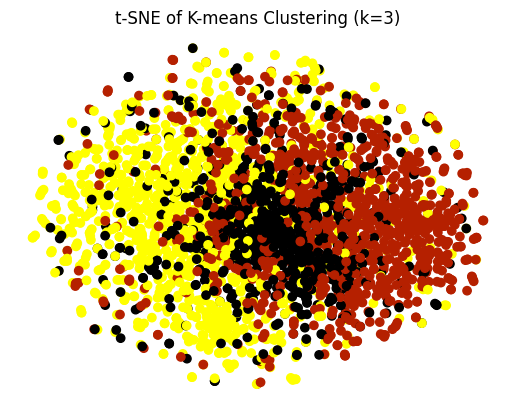

In [384]:
# K-means Classifier
from sklearn.cluster import KMeans
from sklearn.manifold import MDS, TSNE
import matplotlib.pyplot as plt
import numpy as np

tfidf_matrix_dense = np.asarray(tfidf_matrix.todense())

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(tfidf_matrix_dense)

# Project down to 2D with t-SNE for visualization
tsne = TSNE(
    n_components=2,
    perplexity=min(30, len(corpus_labels) - 1),
    random_state=42,
    init="random"
)
coords = tsne.fit_transform(tfidf_matrix_dense)

plt.scatter(coords[:, 0], coords[:, 1], c=kmeans_labels, cmap='gnuplot')

plt.title("t-SNE of K-means Clustering (k=3)")

plt.axis("off")
plt.show()

In [385]:
kmeans.cluster_centers_.shape

(3, 2429)

In [386]:
tfidf_matrix_dense.shape

(2700, 2429)

In [387]:
import numpy as np

unique_labels, label_counts = np.unique(kmeans_labels, return_counts=True)
for label, count in zip(unique_labels, label_counts):
    print(f"Label {label}: {count} occurrences")

Label 0: 690 occurrences
Label 1: 966 occurrences
Label 2: 1044 occurrences


Summarise k-Means results

In [388]:
from sklearn.metrics import classification_report

# For k-means, we need to map cluster numbers to labels
# Find most common true label in each cluster
cluster_label_counts = {}
for cluster_label, true_label in zip(kmeans_labels, corpus_labels):
    if cluster_label not in cluster_label_counts:
        cluster_label_counts[cluster_label] = {}
    if true_label not in cluster_label_counts[cluster_label]:
        cluster_label_counts[cluster_label][true_label] = 0
    cluster_label_counts[cluster_label][true_label] += 1

In [389]:
cluster_label_counts

{np.int32(2): {'TooAfraidToAsk': 743, 'AskMen': 195, 'AskWomen': 106},
 np.int32(0): {'TooAfraidToAsk': 123, 'AskMen': 262, 'AskWomen': 305},
 np.int32(1): {'TooAfraidToAsk': 34, 'AskMen': 443, 'AskWomen': 489}}

In [390]:

# Map clusters to majority labels
cluster_to_label = {
    cluster: max(counts.items(), key=lambda x: x[1])[0]
    for cluster, counts in cluster_label_counts.items()
}

# Convert cluster numbers to predicted labels
kmeans_pred = [cluster_to_label[label] for label in kmeans_labels]

print("\nK-means Clustering Results:")
print(classification_report(corpus_labels, kmeans_pred))


K-means Clustering Results:
                precision    recall  f1-score   support

        AskMen       0.00      0.00      0.00       900
      AskWomen       0.48      0.88      0.62       900
TooAfraidToAsk       0.71      0.83      0.76       900

      accuracy                           0.57      2700
     macro avg       0.40      0.57      0.46      2700
  weighted avg       0.40      0.57      0.46      2700



/opt/anaconda3/envs/fundamentals/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/fundamentals/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/fundamentals/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [391]:
cluster_to_label

{np.int32(2): 'TooAfraidToAsk',
 np.int32(0): 'AskWomen',
 np.int32(1): 'AskWomen'}

In [392]:
# For each kmeans cluster centroid, find nearest document
# in tfidf_matrix_dense
from sklearn.metrics.pairwise import cosine_similarity

cluster_centroids = kmeans.cluster_centers_
cluster_centroid_similarities = cosine_similarity(
    cluster_centroids,
    tfidf_matrix_dense
)

closest_docs = np.argmax(cluster_centroid_similarities, axis=1)

for i, doc_idx in enumerate(closest_docs):
    # Print the document full text by indexing into corpus_text
    print(f"Closest document for subreddit {cluster_to_label[i]}: {corpus_text[doc_idx]}")
    print(posts_df.iloc[doc_idx])
    print()

Closest document for subreddit AskWomen: How do you know when your SO is in a bad mood and how do you deal with it?
title        How do you know when your SO is in a bad mood ...
selftext                                                      
url          https://www.reddit.com/r/AskWomen/comments/ho2...
domain                                                    None
time                                       2020-07-09 13:29:00
author                                              Willow1807
subreddit                                             AskWomen
full_text    How do you know when your SO is in a bad mood ...
Name: 2579, dtype: object

Closest document for subreddit AskWomen: In your experience, what is that one thing you did that got women attracted to you the most?
title        In your experience, what is that one thing you...
selftext                                                      
url          https://www.reddit.com/r/AskMen/comments/z1tzp...
domain                        

In [279]:
# Switch keys and values of cluster_to_label
label_to_cluster = {v: k for k, v in cluster_to_label.items()}
label_to_cluster

{'TooAfraidToAsk': np.int32(1), 'AskWomen': np.int32(0)}

In [280]:
kmeans_pred

['TooAfraidToAsk',
 'TooAfraidToAsk',
 'TooAfraidToAsk',
 'TooAfraidToAsk',
 'AskWomen',
 'TooAfraidToAsk',
 'AskWomen',
 'AskWomen',
 'TooAfraidToAsk',
 'TooAfraidToAsk',
 'AskWomen',
 'TooAfraidToAsk',
 'TooAfraidToAsk',
 'TooAfraidToAsk',
 'AskWomen',
 'TooAfraidToAsk',
 'TooAfraidToAsk',
 'AskWomen',
 'TooAfraidToAsk',
 'TooAfraidToAsk',
 'TooAfraidToAsk',
 'AskWomen',
 'TooAfraidToAsk',
 'TooAfraidToAsk',
 'TooAfraidToAsk',
 'TooAfraidToAsk',
 'TooAfraidToAsk',
 'AskWomen',
 'TooAfraidToAsk',
 'TooAfraidToAsk',
 'TooAfraidToAsk',
 'AskWomen',
 'AskWomen',
 'AskWomen',
 'AskWomen',
 'TooAfraidToAsk',
 'TooAfraidToAsk',
 'AskWomen',
 'TooAfraidToAsk',
 'TooAfraidToAsk',
 'TooAfraidToAsk',
 'AskWomen',
 'AskWomen',
 'TooAfraidToAsk',
 'AskWomen',
 'TooAfraidToAsk',
 'TooAfraidToAsk',
 'TooAfraidToAsk',
 'AskWomen',
 'TooAfraidToAsk',
 'TooAfraidToAsk',
 'TooAfraidToAsk',
 'AskWomen',
 'TooAfraidToAsk',
 'TooAfraidToAsk',
 'AskWomen',
 'TooAfraidToAsk',
 'TooAfraidToAsk',
 'TooAfraidT

In [281]:
confusion

array([[721,   0, 179],
       [180,   0, 720],
       [104,   0, 796]])

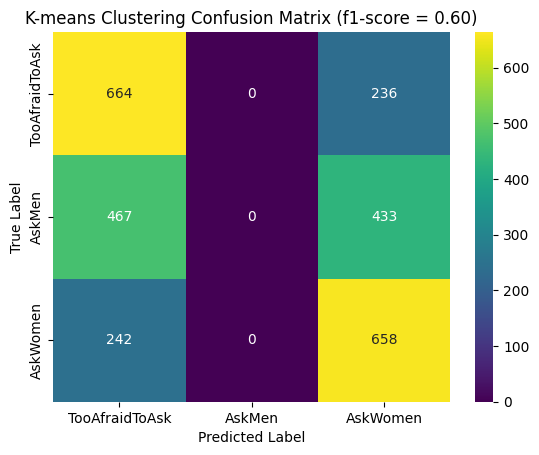

In [282]:
# Plot a confusion matrix between corpus_labels and kmeans_pred
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion = confusion_matrix(corpus_labels, kmeans_pred, labels=subs_of_interest)
sns.heatmap(confusion, annot=True, fmt='d', cmap='viridis')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("K-means Clustering Confusion Matrix (f1-score = 0.60)")

# Center the ticks
plt.xticks(ticks=np.arange(len(subs_of_interest)) + 0.5, labels=subs_of_interest)
plt.yticks(ticks=np.arange(len(subs_of_interest)) + 0.5, labels=subs_of_interest)

plt.show()

<Axes: xlabel='count'>

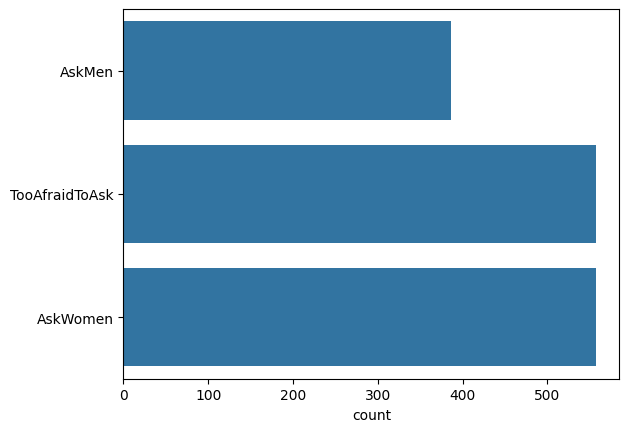

In [ ]:
# Plot value counts of corpus_labels
sns.countplot(kmeans_pred)